In [67]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
import pandas as pd
import os
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
from shapely.geometry import Point
import folium
import rasterio
import numpy as np
import datetime as dt
from rasterstats import zonal_stats
from matplotlib import pyplot

oldpwd = os.getcwd()

In [130]:
mandal_boundaries = gpd.read_file('../../../../../../src/data_preprocessing/tsdm/Mandal_Boundary.shp')
mandal_boundaries = mandal_boundaries.reset_index()

shape_telangana = gpd.read_file('../../../../../../src/data_preprocessing/base_geojson/TL_state_shapefile_for_clip.geojson')
shape_telangana = shape_telangana.explode()


In [70]:
def crop_counts(boundaries, year):
    tiff = '../../../../../../src/data_preprocessing/LULC/01-01-'+str(year)+'.tif'
    lulc = rasterio.open(tiff, mode = 'r')
    lulc_array = lulc.read(1) # landuse corresponding to each rasterpixel, so we extracted the pixel values from the raster
    # affine: 1: corresponds to the width of each pixel, 2: row rotation, 3: x-coordinate of the upper left pixel, 4: column rotation, 5: height of each pixel, 6: y-coordinate of the upper left pixel
    affine = lulc.transform

    cmap = {1: 'Water', 2: 'Trees', 4: 'Flooded Vegetation', 5: 'Crops', 7: 'Built Area', 8: 'Bare Ground', 9: 'Snow/Ice', 10: 'Clouds', 11: 'Rangeland'}
    boundaries['Crops ' + str(year)] = 0
    boundaries['Flooded Vegetation ' + str(year)] = 0

    test = zonal_stats(boundaries.geometry, lulc_array, affine = affine, geojson_out = True, nodata = lulc.nodata, categorical=True, category_map = cmap)

    for i in range(0, len(test)):
        try:
            boundaries['Crops ' + str(year)].iloc[i] = test[i]['properties']['Crops']  * 0.0001
        except:
            boundaries['Crops ' + str(year)].iloc[i] = 0
        try:
            boundaries['Flooded Vegetation ' + str(year)].iloc[i] = test[i]['properties']['Flooded Vegetation']  * 0.0001
        except:
            boundaries['Flooded Vegetation ' + str(year)].iloc[i] = 0
        
    return (boundaries)

In [71]:
for a in range(2017, 2022):
    mandal_boundaries = crop_counts(mandal_boundaries, a)
    print('Year ' + str(a) + ' is completed.')

Year 2017 is completed.
Year 2018 is completed.
Year 2019 is completed.
Year 2020 is completed.
Year 2021 is completed.


In [72]:
mandal_boundaries

,index,Area,S_No,No_HH,TOT_P,TOT_M,TOT_F,P_06,M_06,F_06,...,Crops 2017,Flooded Vegetation 2017,Crops 2018,Flooded Vegetation 2018,Crops 2019,Flooded Vegetation 2019,Crops 2020,Flooded Vegetation 2020,Crops 2021,Flooded Vegetation 2021
0,0,255.0,415.0,37246.0,156067.0,79754.0,76313.0,17498.0,9151.0,8347.0,...,84.9836,0.0144,80.2551,0.0019,90.2137,0.0000,76.1404,0.0007,84.4641,0.4703
1,1,502.0,278.0,15679.0,69875.0,36019.0,33856.0,8986.0,4726.0,4260.0,...,197.5611,0.0000,207.8593,0.0000,183.9440,0.0000,206.6133,0.0000,218.2740,0.0102
2,2,126.0,298.0,4267.0,17249.0,8827.0,8422.0,2261.0,1193.0,1068.0,...,81.2996,0.0016,86.1867,0.0004,84.7520,0.0000,84.4137,0.0035,88.9952,0.0055
3,3,142.0,573.0,6618.0,25849.0,12901.0,12948.0,2482.0,1234.0,1248.0,...,126.8147,0.0285,130.0430,0.0000,132.8201,0.0000,129.4461,0.0000,129.6141,0.1054
4,4,134.0,201.0,6256.0,31224.0,15739.0,15485.0,4056.0,2061.0,1995.0,...,108.2324,0.0931,113.0839,0.0015,102.6739,0.0000,113.9548,0.2054,115.9068,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,587,244.0,373.0,3304.0,13452.0,6514.0,6938.0,1365.0,698.0,667.0,...,23.9109,0.0006,24.5527,0.0000,24.7084,0.0000,24.2441,0.0083,24.7101,0.0056
588,588,244.0,363.0,2532.0,10878.0,5359.0,5519.0,1272.0,653.0,619.0,...,30.0628,0.0209,30.0674,0.0000,30.1379,0.0005,31.8042,0.0472,32.0116,0.0314
589,589,249.0,460.0,11364.0,51386.0,25737.0,25649.0,6220.0,3186.0,3034.0,...,83.2802,0.5067,87.7785,0.0335,90.3907,0.0000,90.9823,0.0000,87.2330,0.0010
590,590,212.0,253.0,9516.0,42309.0,20842.0,21467.0,5078.0,2611.0,2467.0,...,45.3161,0.0000,48.8000,0.0000,49.3215,0.0000,47.6468,0.0000,48.6953,0.0000


In [73]:
crops_over_time_mandal = mandal_boundaries[['geometry', 'Crops 2017', 'Crops 2018', 'Crops 2019', 'Crops 2020', 'Crops 2021',  'Flooded Vegetation 2017', 'Flooded Vegetation 2018', 'Flooded Vegetation 2019' ,'Flooded Vegetation 2020' ,'Flooded Vegetation 2021' ]]


In [74]:
crops_over_time_mandal['2017'] = crops_over_time_mandal['Crops 2017'] + crops_over_time_mandal['Flooded Vegetation 2017']
crops_over_time_mandal['2018'] = crops_over_time_mandal['Crops 2018'] + crops_over_time_mandal['Flooded Vegetation 2018']
crops_over_time_mandal['2019'] = crops_over_time_mandal['Crops 2019'] + crops_over_time_mandal['Flooded Vegetation 2019']
crops_over_time_mandal['2020'] = crops_over_time_mandal['Crops 2020'] + crops_over_time_mandal['Flooded Vegetation 2020']
crops_over_time_mandal['2021'] = crops_over_time_mandal['Crops 2021'] + crops_over_time_mandal['Flooded Vegetation 2021']
crops_over_time_mandal = crops_over_time_mandal[['geometry', '2017', '2018', '2019', '2020', '2021']]

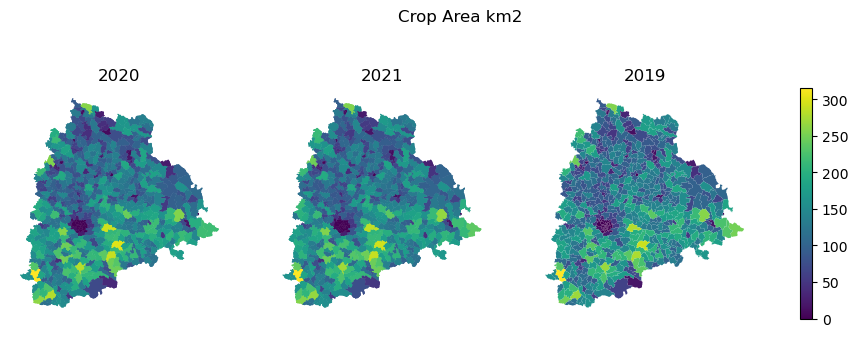

In [75]:
#crops_over_time_mandal = crops_over_time_mandal.reset_index()
fig, (axs) = pyplot.subplots(ncols=3, figsize=(12,4))
axs=axs.ravel()

axs[0].axis('off')
axs[0].set_title('2017')
crops_over_time_mandal.plot(ax = axs[0], column = '2017')

axs[1].axis('off')
axs[1].set_title('2018')
crops_over_time_mandal.plot(ax = axs[1], column = '2018')

axs[2].axis('off')
axs[2].set_title('2019')
crops_over_time_mandal.plot(ax = axs[2], column = '2019')

axs[0].axis('off')
axs[0].set_title('2020')
crops_over_time_mandal.plot(ax = axs[0], column = '2020')

axs[1].axis('off')
axs[1].set_title('2021')
crops_over_time_mandal.plot(ax = axs[1], column = '2021')


patch_col = axs[0].collections[0]
cb = fig.colorbar(patch_col, ax=axs, shrink = 0.75)
fig.suptitle('Crop Area km2')
plt.show()

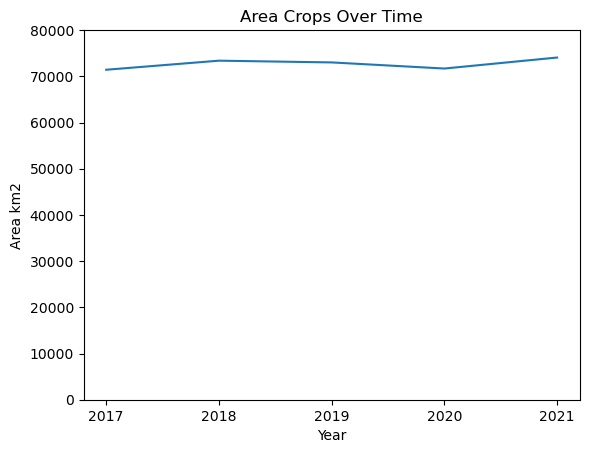

In [76]:
plt.plot(['2017', '2018', '2019','2020','2021'], [crops_over_time_mandal['2017'].sum(), crops_over_time_mandal['2018'].sum() , crops_over_time_mandal['2019'].sum(), crops_over_time_mandal['2020'].sum(), crops_over_time_mandal['2021'].sum()])
plt.title('Area Crops Over Time')
plt.ylim([0, 80000])
plt.xlabel('Year')
plt.ylabel('Area km2')
plt.show()

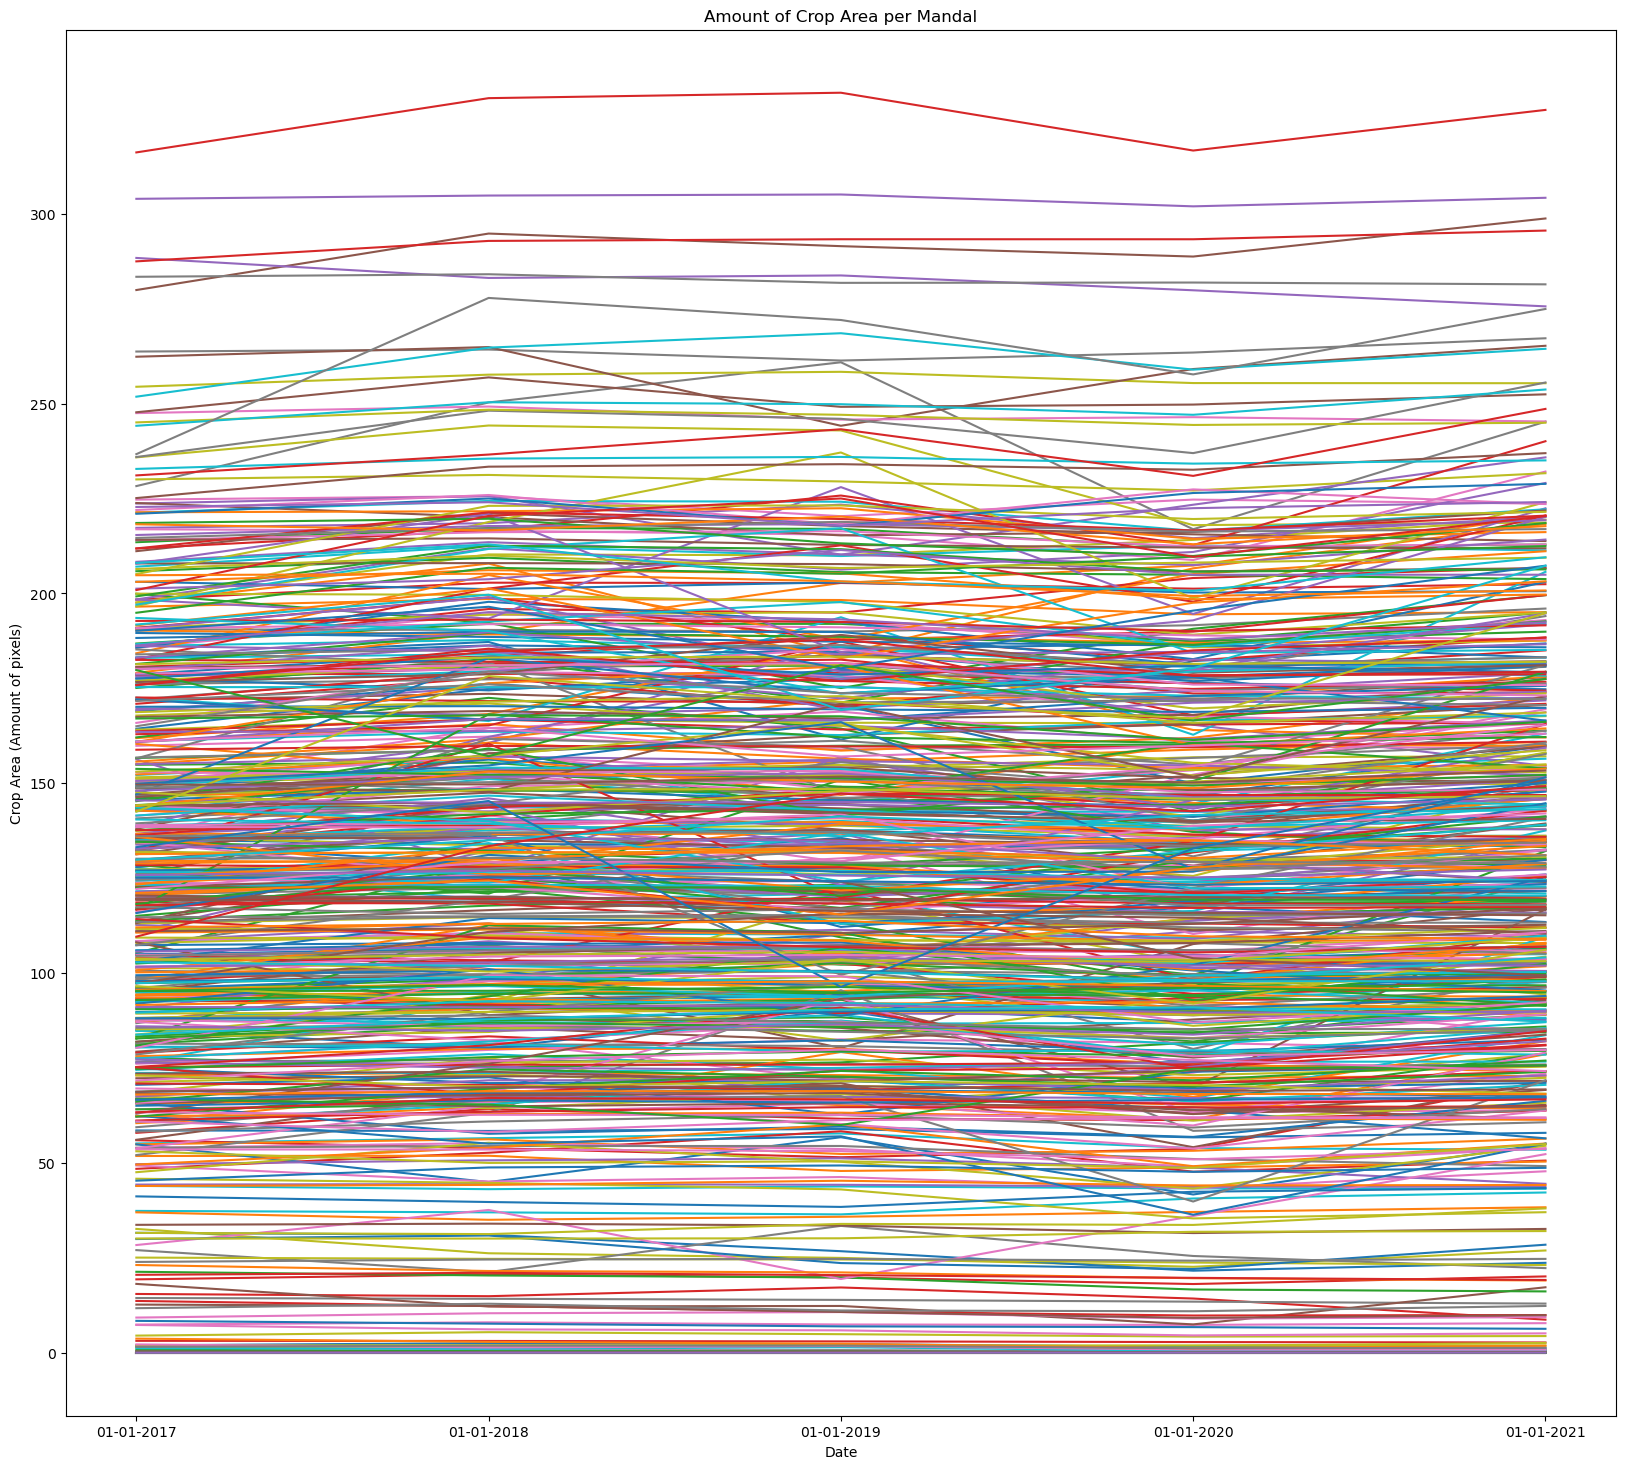

In [77]:
fig = plt.figure(figsize = (20,18))

for i in range(0, len(mandal_boundaries)):
    x_axis = ['01-01-2017', '01-01-2018', '01-01-2019', '01-01-2020', '01-01-2021']
    y_axis = crops_over_time_mandal.loc[i].to_list()[1:]
    plt.plot(x_axis, y_axis)

plt.title('Amount of Crop Area per Mandal')
plt.xlabel('Date')
plt.ylabel('Crop Area (Amount of pixels)')
plt.show()

In [78]:
from statsmodels.tsa.stattools import adfuller     
from statsmodels.tsa.stattools import kpss

adf_test = []
kpss_test = []
for i in range(0, len(mandal_boundaries)):
    X = crops_over_time_mandal.loc[i][1:]
    result = adfuller(X)
    adf_test.append(result[1])

    try:
        kpsstest = kpss(X, regression='c', nlags="auto")
        kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
        kpss_test.append(kpss_output[1])
    except:
        kpss_test.append(0.1)


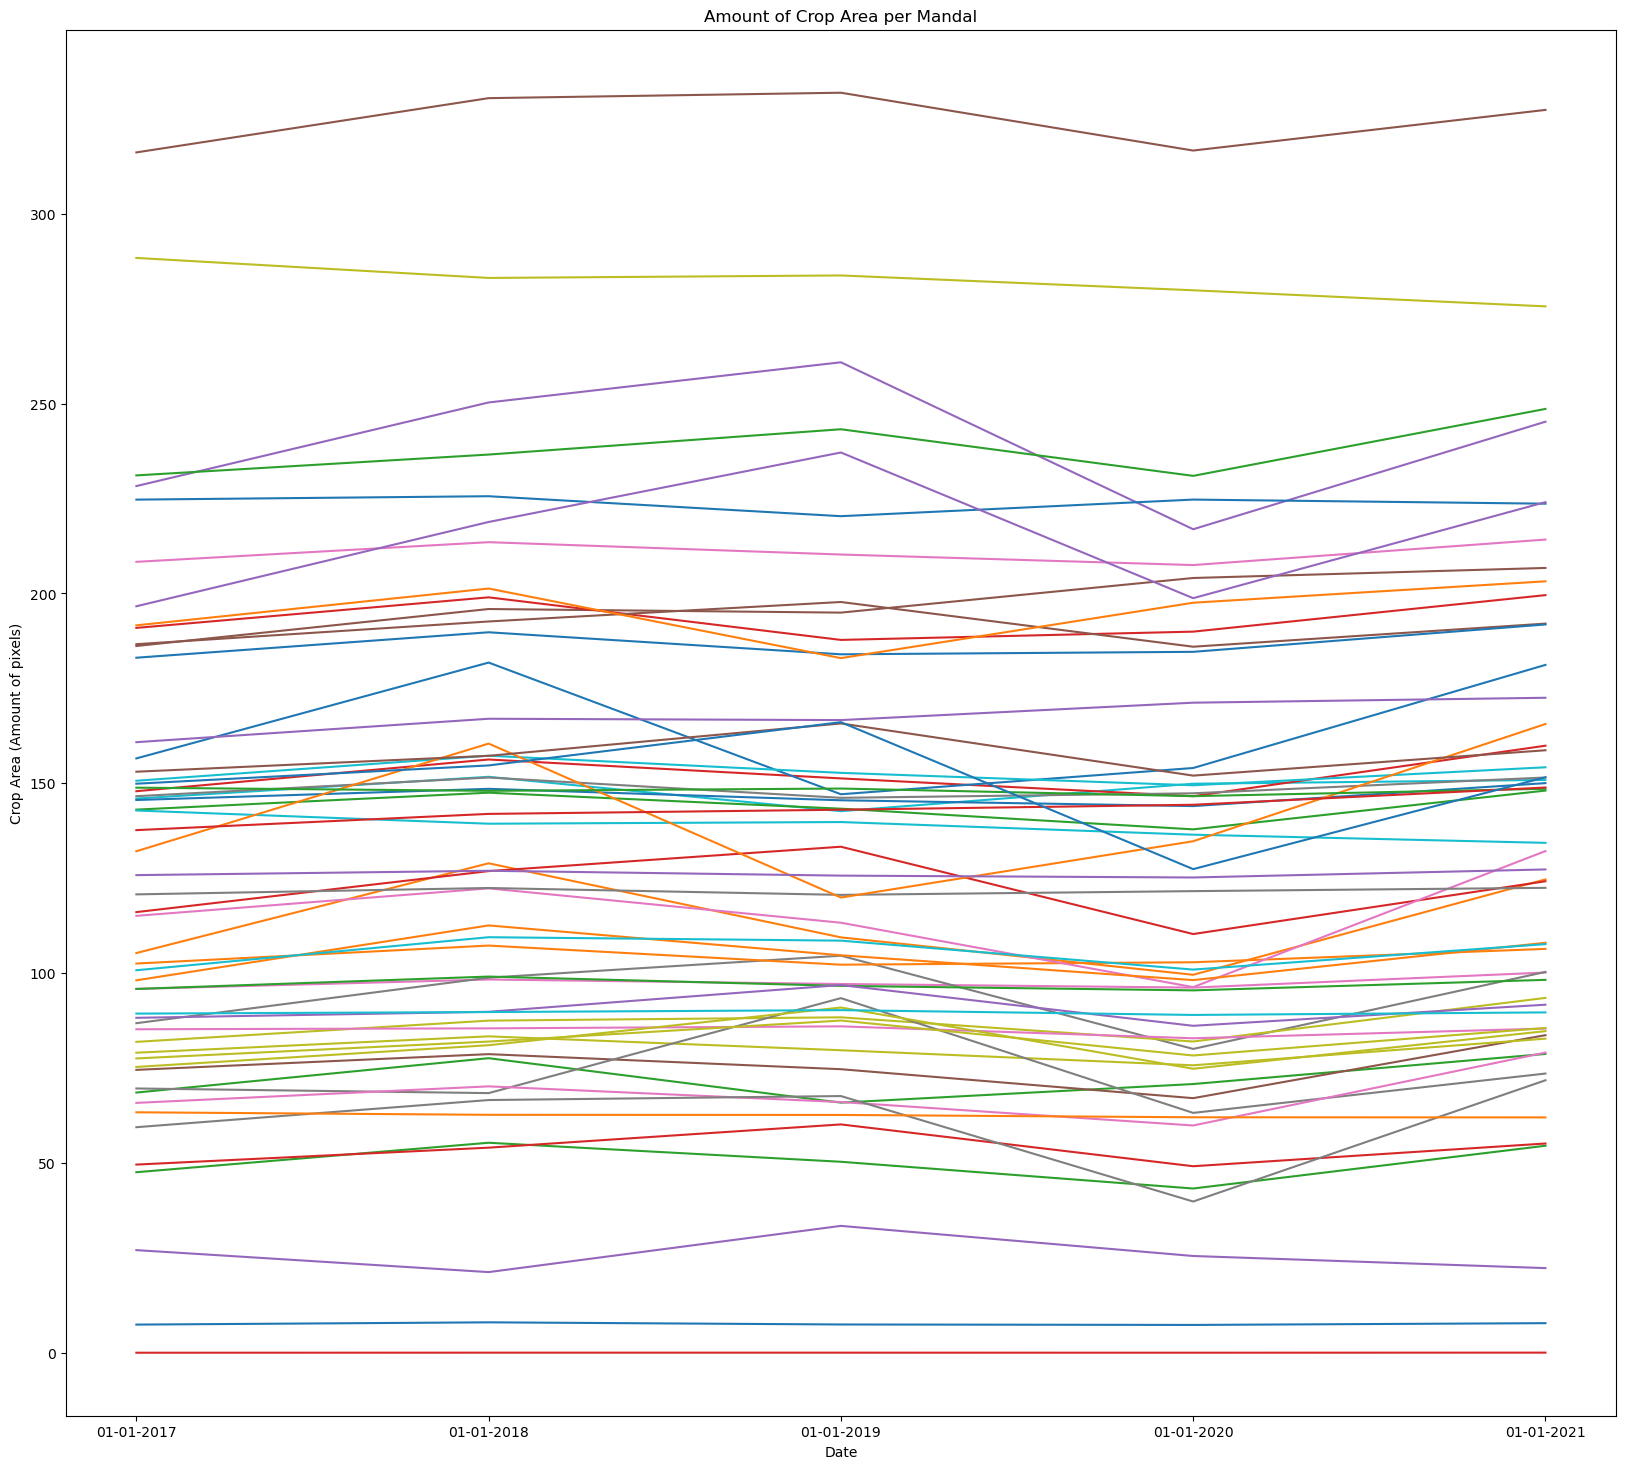

In [79]:
fig = plt.figure(figsize = (20,18))

for i in range(0, len(mandal_boundaries)):
    kpss_test[i]
    if (kpss_test[i]<0.05) & (adf_test[i]>0.05):
        x_axis = ['01-01-2017', '01-01-2018', '01-01-2019', '01-01-2020', '01-01-2021']
        y_axis = crops_over_time_mandal.loc[i].to_list()[1:]
        plt.plot(x_axis, y_axis)

plt.title('Amount of Crop Area per Mandal')
plt.xlabel('Date')
plt.ylabel('Crop Area (Amount of pixels)')
plt.show()

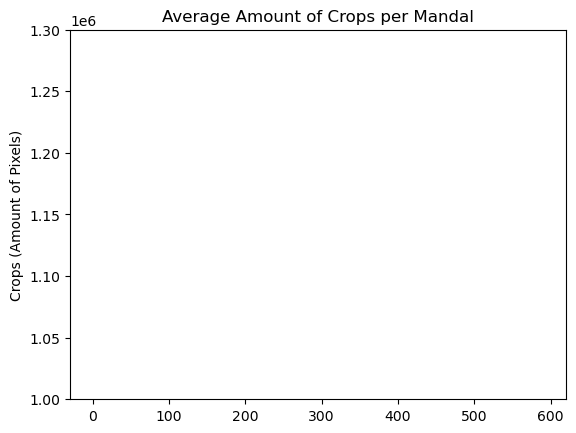

In [91]:
crops_over_time_mandal.mean(axis = 1).plot()
plt.ylim(1000000, 1300000)
plt.title('Average Amount of Crops per Mandal')
plt.ylabel('Crops (Amount of Pixels)')
plt.show()


In [114]:
plot_mean =gpd.GeoDataFrame()
plot_mean['Mandal_Nam'] = list(mandal_boundaries.Mandal_Nam)
plot_mean['mean_value']  = crops_over_time_mandal.mean(axis = 1)
plot_mean['geometry'] = crops_over_time_mandal['geometry']
#plot_mean = plot_mean.set_geometry(plot_mean["geometry"])


<AxesSubplot:>

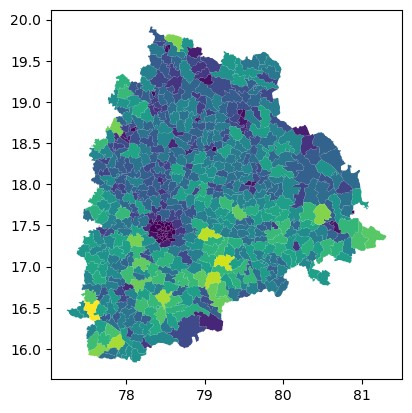

In [117]:
plot_mean.plot(column='mean_value')

[Text(0, 0, 'Abdullapurmet'),
 Text(1, 0, 'Achampet'),
 Text(2, 0, 'Adavidevulapally'),
 Text(3, 0, 'Addagudur'),
 Text(4, 0, 'Addakal'),
 Text(5, 0, 'Adilabad Rural'),
 Text(6, 0, 'Adilabad Urban'),
 Text(7, 0, 'Aiza'),
 Text(8, 0, 'Akkannapet'),
 Text(9, 0, 'Alair'),
 Text(10, 0, 'Alampur'),
 Text(11, 0, 'Alladurg'),
 Text(12, 0, 'Allapalli'),
 Text(13, 0, 'Alwal'),
 Text(14, 0, 'Amangal'),
 Text(15, 0, 'Amarchintha'),
 Text(16, 0, 'Amberpet'),
 Text(17, 0, 'Ammerpet'),
 Text(18, 0, 'Amrabad'),
 Text(19, 0, 'Ananthagiri'),
 Text(20, 0, 'Andole'),
 Text(21, 0, 'Annapureddipalle'),
 Text(22, 0, 'Anumula_Haliya'),
 Text(23, 0, 'Armoor'),
 Text(24, 0, 'Asifabad'),
 Text(25, 0, 'Asifnagar'),
 Text(26, 0, 'Aswapuram'),
 Text(27, 0, 'Aswaraopeta'),
 Text(28, 0, 'Athmakur (M)'),
 Text(29, 0, 'Atmakur'),
 Text(30, 0, 'Atmakur'),
 Text(31, 0, 'Atmakur_S'),
 Text(32, 0, 'B.Pochampally'),
 Text(33, 0, 'Bachannapet'),
 Text(34, 0, 'Bachupally'),
 Text(35, 0, 'Bahadurpura'),
 Text(36, 0, 'Balanaga

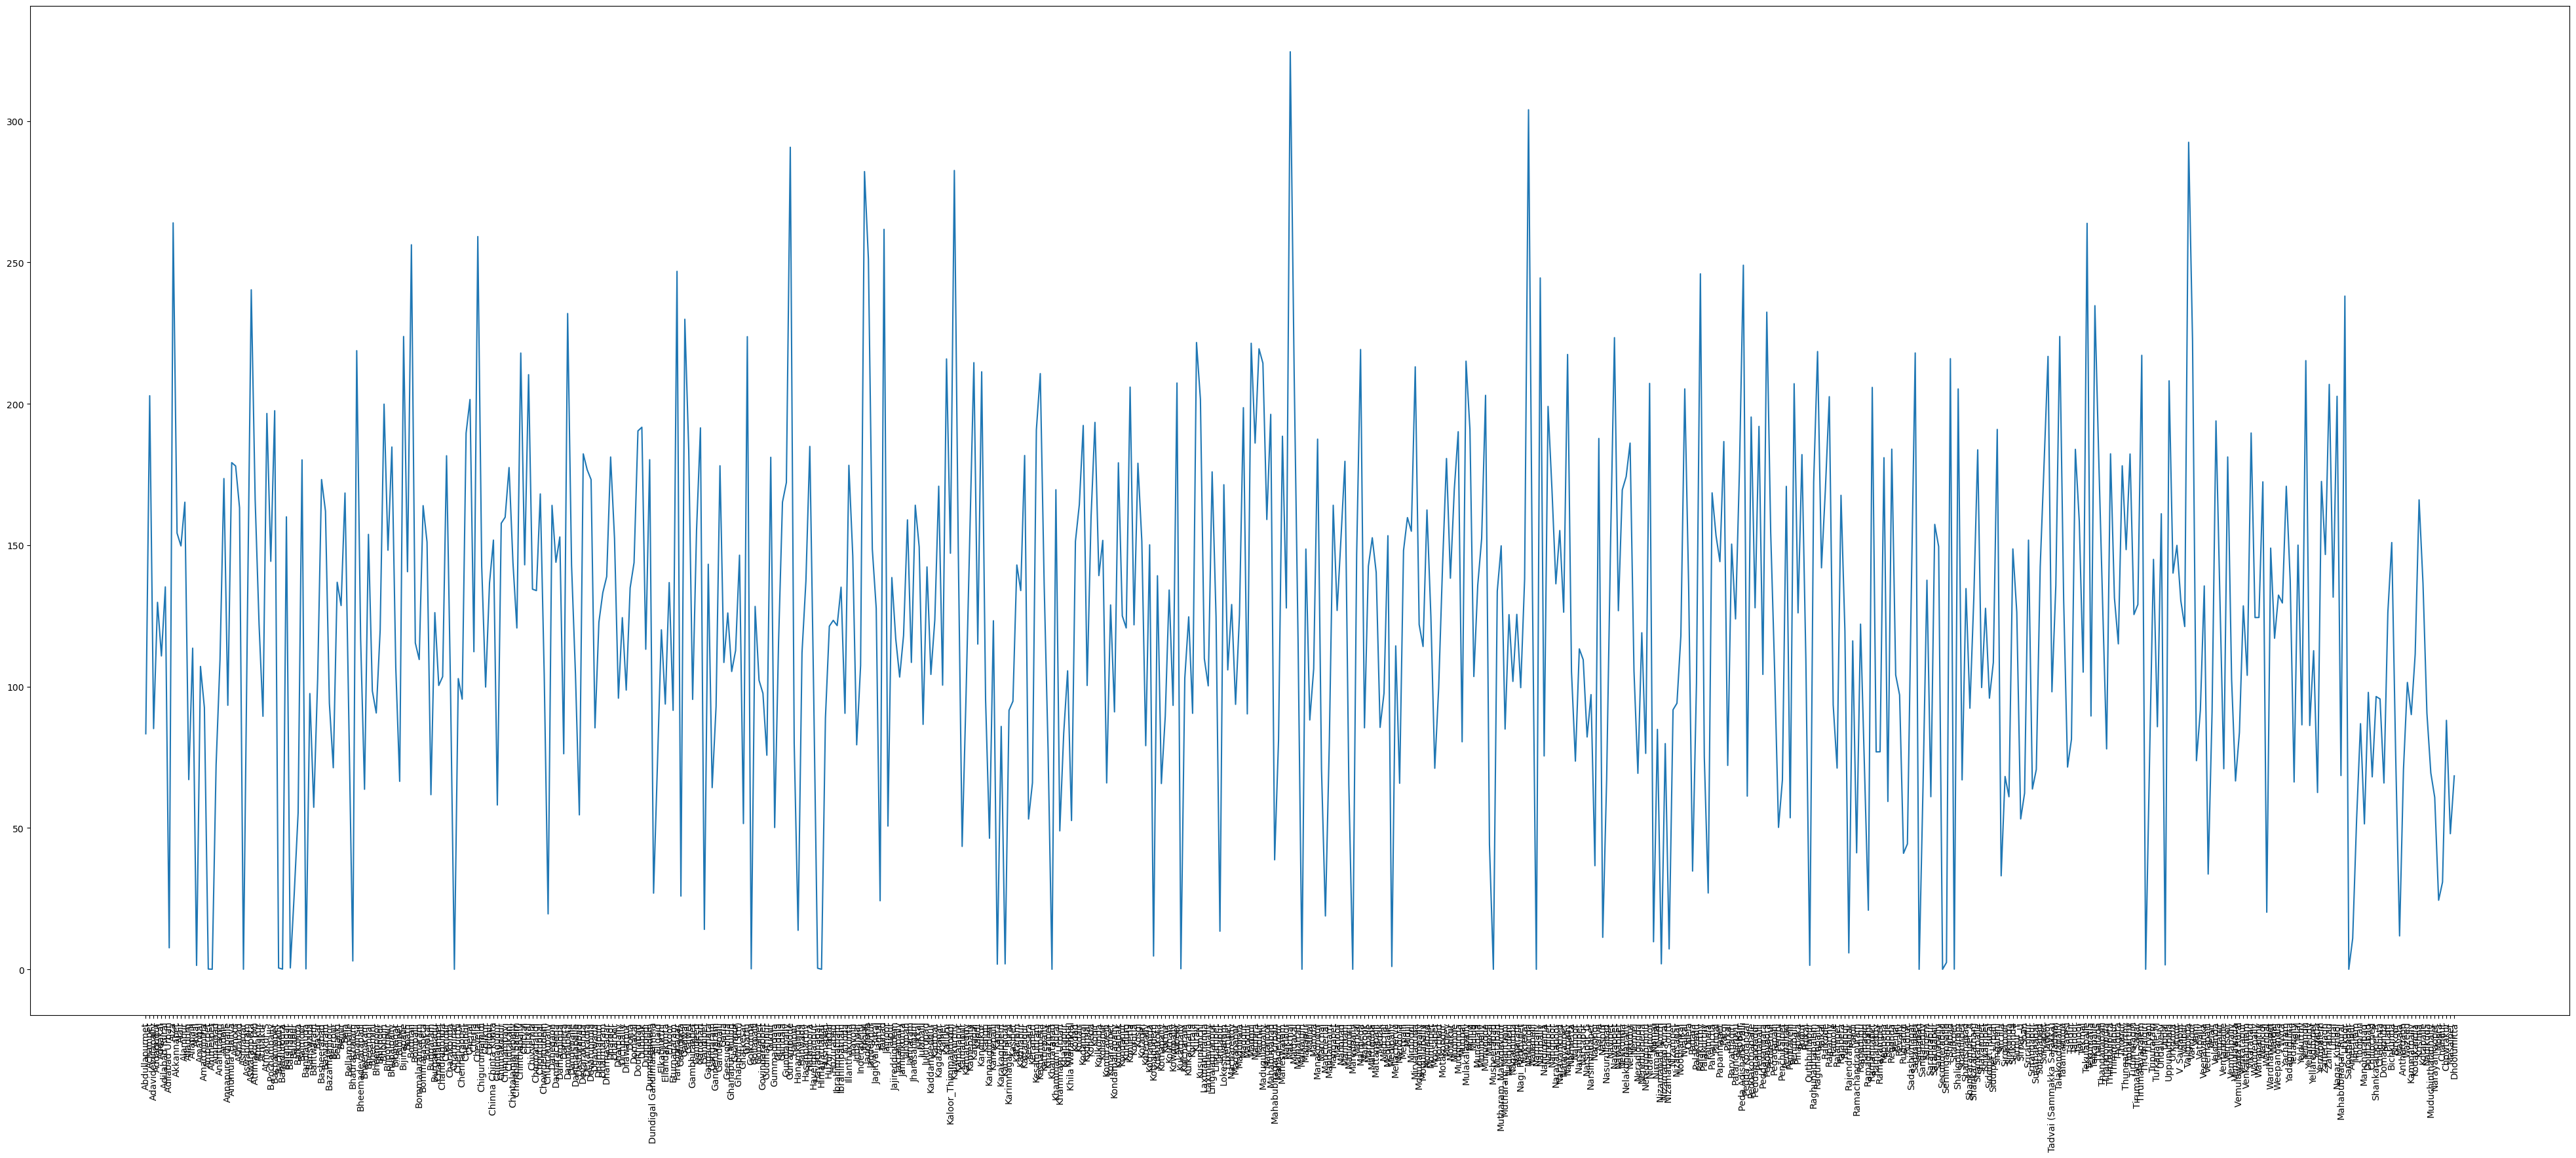

In [128]:
ax = plot_mean.mean_value.plot(xticks=plot_mean.index, rot=90, figsize=(50, 20),)
ax.set_xticklabels(plot_mean.Mandal_Nam)